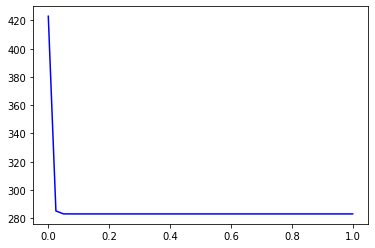

Nt_RK45: 8


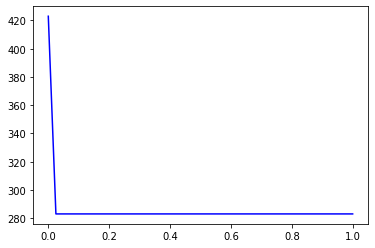

41
4.763527015933854e-06
9.527054031867709e-06
5.7162324191206255e-05
0.0001047975943505448
0.0003148432967977208
0.0005248889992448968
0.0007349347016920728
0.001


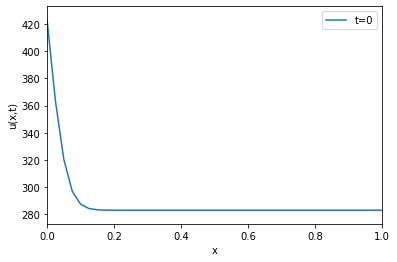

In [3]:
"""Temperature evolution in a rod, computed by explicit odespy solvers."""

from numpy import linspace, zeros, linspace, array
import matplotlib.pyplot as plt
import time
import numpy as np

def rhs(t, u):
    N = len(u) - 1
    rhs = zeros(N+1)
    rhs[0] = dsdt(t)
    for i in range(1, N):
        rhs[i] = (beta/dx**2)*(u[i+1] - 2*u[i] + u[i-1]) + \
                 f(x[i], t)
    rhs[N] = (beta/dx**2)*(2*u[i-1] + 2*dx*dudx(t) -
                           2*u[i]) + f(x[N], t)
    return rhs

def dudx(t):
    return 0

def s(t):
    return 423

def dsdt(t):
    return 0

def f(x, t):
    return 0

def K(t, u):
    #N = len(u) - 1
    N = len(u) - 1
    K = zeros((N+1,N+1))
    K[0,0] = 0
    for i in range(1, N):
        K[i,i-1] = beta/dx**2
        K[i,i] = -2*beta/dx**2
        K[i,i+1] = beta/dx**2
    K[N,N-1] = (beta/dx**2)*2
    K[N,N] = (beta/dx**2)*(-2)
    return K

L = 1
beta = 1
N = 40
x = linspace(0, L, N+1)
dx = x[1] - x[0]
u = zeros(N+1)

U_0 = zeros(N+1)
U_0[0] = s(0)
U_0[1:] = 283
dt = dx**2/(2*beta)
dt *= 100

from math import e
from scipy import integrate as inte
import matplotlib.pyplot as plt


T = 0.001
solution = inte.BDF(rhs, 0, U_0, T, 0.01,atol=1e-3,jac=K) #vectorized=True)
y_values = []
time_points = []
for i in range(10000):
# get solution step state
    solution.step() #implemented function in scipy to collect data
    time_points.append(solution.t)
    for j in range(N+1):
        y_values.append(solution.y[j])
    # break loop after modeling is finished
    if solution.status == 'finished':
        break
#print (y_values1)   

u_value = np.reshape(y_values,(len(time_points),N+1))
new_value = np.zeros(N+1)
for i in range(N+1):
    new_value[i] = u_value[1][i]

plt.plot(x, new_value, 'b-')
plt.show()
print ("Nt_RK45:", len(time_points))
plt.plot(x, U_0, 'b-')
plt.show()
  
# Make movie
import os
os.system('rm tmp_*.png')
import matplotlib.pyplot as plt
import time
plt.ion()
print (len(u))
y = u_value[0,:]
lines = plt.plot(x, y)
plt.axis([x[0], x[-1], 273, s(0)+10])
plt.xlabel('x')
plt.ylabel('u(x,t)')
counter = 0
for i in range(0, len(time_points)):
    print (time_points[i])
    lines[0].set_ydata(u_value[i,:])
    plt.legend(['t=%.0f' % time_points[i]])
    plt.draw()
    plt.savefig('tmp_%04d.png' % counter)
    counter += 1
    time.sleep(0.2)